In [2]:
import torch
import torchvision

In [3]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
trainset  = torchvision.datasets.MNIST(download=True, root='./data', train=True,  transform=transform)
testset   = torchvision.datasets.MNIST(download=True, root='./data', train=False, transform=transform)

In [4]:
trainloader = torch.utils.data.DataLoader(trainset, shuffle=True, batch_size=4, num_workers=2)

In [8]:
class Autoencoder(torch.nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(1, 16, 3)
            , torch.nn.ReLU()
            , torch.nn.AdaptiveMaxPool2d((14,14)),
            torch.nn.Conv2d(16, 8, 3)
            , torch.nn.ReLU()
            , torch.nn.AdaptiveMaxPool2d((8,8)),
            torch.nn.Conv2d(8, 8, 3)
            , torch.nn.ReLU()
            , torch.nn.AdaptiveMaxPool2d((4,4))
        )
        
        self.decoder = torch.nn.Sequential(
            torch.nn.Conv2d(8, 8, 3)
            , torch.nn.ReLU()
            , torch.nn.AdaptiveMaxPool2d((8, 8)),
            torch.nn.Conv2d(8, 16, 3)
            , torch.nn.ReLU()
            , torch.nn.AdaptiveMaxPool2d((14, 14)),
            torch.nn.Conv2d(16, 8, 3)
            , torch.nn.ReLU()
            , torch.nn.AdaptiveMaxPool2d((30, 30)),
            torch.nn.Conv2d(8, 1, 3)
            , torch.nn.Sigmoid()
        )
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return(x)
    
autoencoder = Autoencoder()

In [9]:
#criterion = torch.nn.CrossEntropyLoss()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adadelta(autoencoder.parameters())

In [12]:
###
import timeit
start_time = timeit.default_timer()
###
num_epochs = 5
for epoch in range(num_epochs):
    for num_batch, data in enumerate(trainloader):
        optimizer.zero_grad()
        x, _ = data
        x = torch.autograd.Variable(x)
        output = autoencoder(x)
        loss = criterion(output, x)
        loss.backward()
        optimizer.step()
        if num_batch % 2000 == 1999:
            print('epoch: ', epoch, 'loss: ', loss.data[0])
###
elapsed = timeit.default_timer() - start_time
print("time: ", elapsed)
###

epoch:  0 loss:  0.023326197639107704
epoch:  0 loss:  0.02551387995481491
epoch:  0 loss:  0.02025729976594448
epoch:  0 loss:  0.028423648327589035
epoch:  0 loss:  0.02090676687657833
epoch:  0 loss:  0.027652693912386894
epoch:  0 loss:  0.02390868030488491
epoch:  1 loss:  0.029300721362233162
epoch:  1 loss:  0.03031419962644577
epoch:  1 loss:  0.017145918682217598
epoch:  1 loss:  0.026946743950247765
epoch:  1 loss:  0.019312981516122818
epoch:  1 loss:  0.02089577540755272
epoch:  1 loss:  0.027017688378691673
epoch:  2 loss:  0.017679976299405098
epoch:  2 loss:  0.024861859157681465
epoch:  2 loss:  0.016739169135689735
epoch:  2 loss:  0.018384838476777077
epoch:  2 loss:  0.024160725995898247
epoch:  2 loss:  0.02997446060180664
epoch:  2 loss:  0.01666792668402195
epoch:  3 loss:  0.026211820542812347
epoch:  3 loss:  0.023357711732387543
epoch:  3 loss:  0.019914088770747185
epoch:  3 loss:  0.01789308898150921
epoch:  3 loss:  0.018185116350650787
epoch:  3 loss:  0.02

In [14]:
testloader = torch.utils.data.DataLoader(testset, batch_size=10, num_workers=2)
n=0
for num_batch, data in enumerate(testloader):
    myInput, _ = data
    #myInput = myInput.view(10, 1, 784)
    myInput = torch.autograd.Variable(myInput)
    myOutput = autoencoder(myInput)
    break
    
myInput = myInput.data.numpy()
myOutput = myOutput.data.numpy()

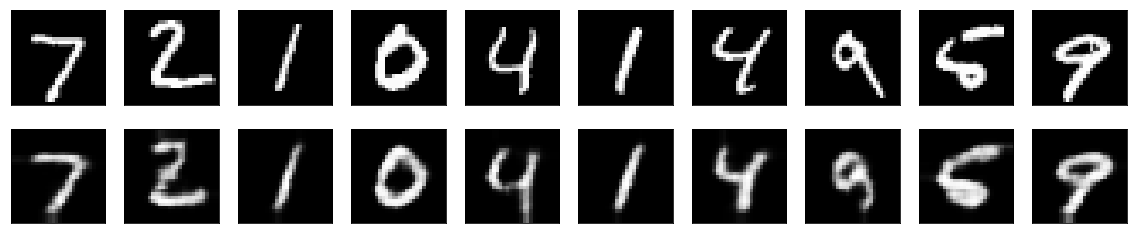

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(myInput[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(myOutput[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()